In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
import model
import train

In [3]:
import ast

In [4]:
def fails(func):
    try:
        func()
        return False
    except:
        return True

In [5]:
data = train.read_all()
data = {handle:result_for_handle for handle, result_for_handle in data.items() if len(result_for_handle) >= 65 and len(result_for_handle) <= 70}

In [6]:
common_problems = ['935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '937:A [Olympiad].py',
 '938:A [Word Correction].py',
 '938:B [Run For Your Prize].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py']


common_problems = ['950:A [Left-handers, Right-handers and Ambidexters].py',
 '931:A [Friends Meeting].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '937:A [Olympiad].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '931:B [World Cup].py',
 '935:C [Fifa and Fafa].py',
 '946:C [String Transformation].py',
 '934:B [A Prosperous Lot].py',
 '939:A [Love Triangle].py',
 '934:A [A Compatible Pair].py',
 '940:B [Our Tanya is Crying Out Loud].py']

common_problems = [
    '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '950:B [Intercepted Message].py',
 '935:A [Fafa and his Company].py',
 '938:A [Word Correction].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py',
 '938:B [Run For Your Prize].py',
 '937:A [Olympiad].py',
 '940:B [Our Tanya is Crying Out Loud].py',
 '938:C [Constructing Tests].py',
 '940:A [Points on the line].py',
 '937:C [Save Energy!].py',
 '934:B [A Prosperous Lot].py',
 '931:B [World Cup].py',
 '939:A [Love Triangle].py']


common_problems = ['946:A [Partition].py',
 '935:B [Fafa and the Gates].py',
 '935:C [Fifa and Fafa].py',
 '935:A [Fafa and his Company].py',
 '940:B [Our Tanya is Crying Out Loud].py',
 '929:A [Прокат велосипедов].py',
 '940:A [Points on the line].py',
 '950:B [Intercepted Message].py',
 '938:B [Run For Your Prize].py',
 '946:C [String Transformation].py',
 '946:B [Weird Subtraction Process].py',
 '934:B [A Prosperous Lot].py',
 '931:B [World Cup].py',
 '939:A [Love Triangle].py',
 '931:C [Laboratory Work].py',
 '934:A [A Compatible Pair].py',
 '937:B [Vile Grasshoppers].py',
 '932:A [Palindromic Supersequence].py',
 '938:A [Word Correction].py',
 '950:A [Left-handers, Right-handers and Ambidexters].py',
 '939:B [Hamster Farm].py',
 '931:A [Friends Meeting].py',
 '937:A [Olympiad].py']

common_problems = ['950:A [Left-handers, Right-handers and Ambidexters].py',
 '937:A [Olympiad].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '931:A [Friends Meeting].py',
 '946:A [Partition].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '946:C [String Transformation].py',
 '932:A [Palindromic Supersequence].py',
 '931:B [World Cup].py',
 '939:A [Love Triangle].py',
 '946:B [Weird Subtraction Process].py',
 '939:B [Hamster Farm].py',
 '935:C [Fifa and Fafa].py',
 '934:B [A Prosperous Lot].py',
 '940:A [Points on the line].py',
 '937:B [Vile Grasshoppers].py',
 '940:B [Our Tanya is Crying Out Loud].py',
 '938:B [Run For Your Prize].py',
 '934:A [A Compatible Pair].py',
 '931:C [Laboratory Work].py',
 '937:C [Save Energy!].py',
 '940:C [Phone Numbers].py',
 '948:A [Protect Sheep].py',
 '931:D [Peculiar apple-tree].py',
 '939:C [Convenient For Everybody].py',
 '935:D [Fafa and Ancient Alphabet].py',
 '940:D [Alena And The Heater].py',
 '938:C [Constructing Tests].py',
 '950:C [Zebras].py',
 '934:D [A Determined Cleanup].py',
 '929:B [Места в самолёте].py',
 '929:A [Прокат велосипедов].py',
 '944:A [World Cup].py',
 '937:E [Lock Puzzle].py',
 '933:A [A Twisty Movement].py',
 '944:B [Laboratory Work].py',
 '929:C [Красивая команда].py',
 '934:C [A Twisty Movement].py',
 '939:D [Love Rescue].py',
 '948:B [Primal Sport].py',
 '937:D [Sleepy Game].py']


In [7]:
train_size = 20
train_problems = common_problems[:train_size]
test_problems = common_problems[train_size:]

In [8]:
train_problems

['950:A [Left-handers, Right-handers and Ambidexters].py',
 '937:A [Olympiad].py',
 '935:A [Fafa and his Company].py',
 '935:B [Fafa and the Gates].py',
 '931:A [Friends Meeting].py',
 '946:A [Partition].py',
 '938:A [Word Correction].py',
 '950:B [Intercepted Message].py',
 '946:C [String Transformation].py',
 '932:A [Palindromic Supersequence].py',
 '931:B [World Cup].py',
 '939:A [Love Triangle].py',
 '946:B [Weird Subtraction Process].py',
 '939:B [Hamster Farm].py',
 '935:C [Fifa and Fafa].py',
 '934:B [A Prosperous Lot].py',
 '940:A [Points on the line].py',
 '937:B [Vile Grasshoppers].py',
 '940:B [Our Tanya is Crying Out Loud].py',
 '938:B [Run For Your Prize].py']

In [9]:
# for handle, result_for_handle in data.items():
#     current = {}
#     for problem, solution in result_for_handle.items():
#         if problem in common_problems:
#             if not fails(lambda: ast.parse(solution)):
#                 current[problem] = solution
    
#     data[handle] = current

In [10]:
# test.keys()

In [11]:
# data

In [12]:
# for node in ast.walk(parsed):
#     print(node)

In [13]:
# train_problems

In [14]:
batch_sampler = train.StratifiedBatcher(data, 64, 0.75)

In [15]:
batch_sampler.get_n_classes()

3

In [16]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([0, 1, 2]), array([49, 51, 49]))

In [17]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([0, 1, 2]), array([17, 18, 17]))

In [18]:
cls = model.Model(batch_sampler.get_n_classes(), embedding_dims=100)

In [19]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()))

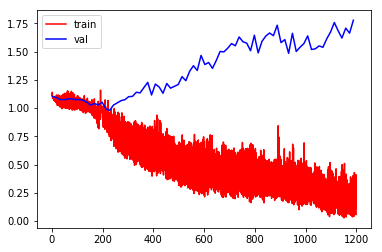

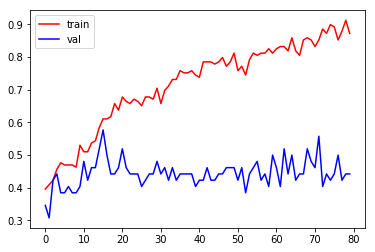

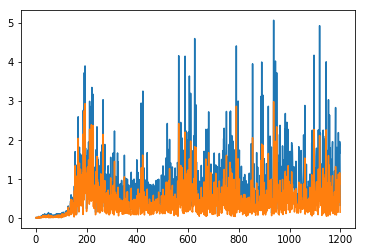

0.058925238


In [20]:
trainer.train(batch_sampler, {"n_epochs":400})

In [21]:
# batch_sampler.y_train

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [23]:
x, y = batch_sampler.x_train, batch_sampler.y_train
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

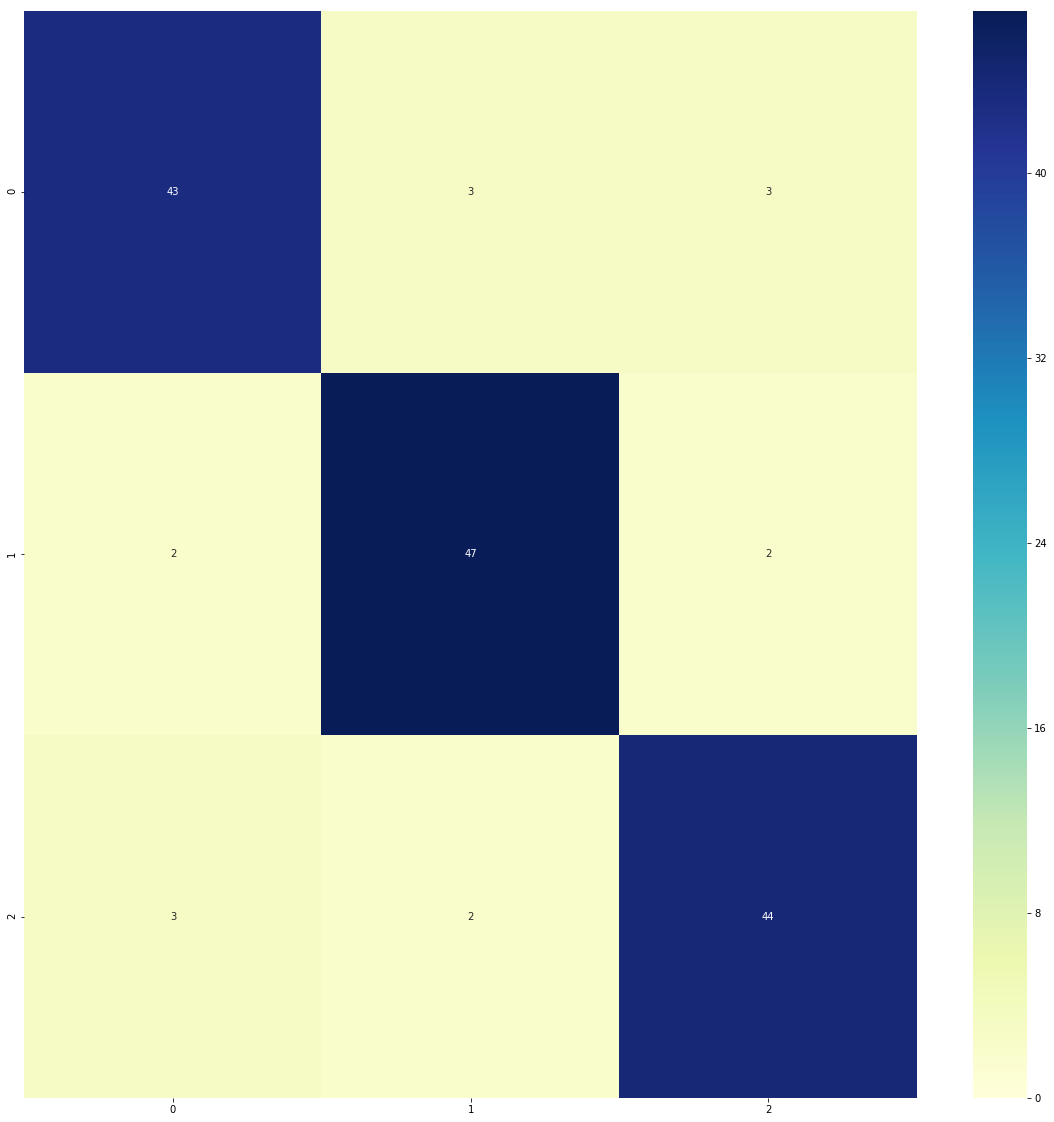

In [24]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [25]:
x, y = batch_sampler.x_test, batch_sampler.y_test
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

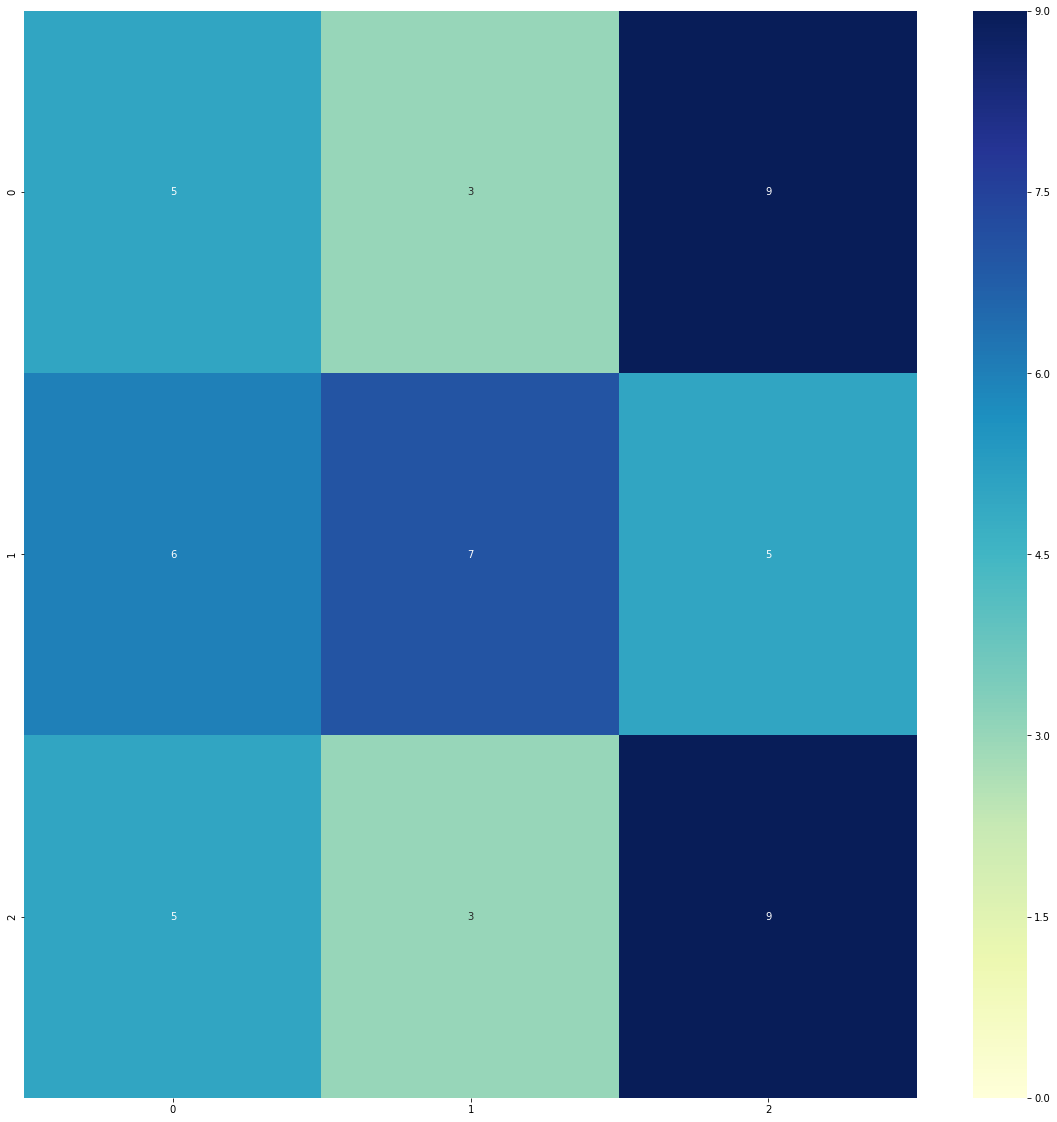

In [26]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [506]:
for code in batch_sampler.x_train:
    print(code)
    print("#######################################\n#############")

from math import factorial as f

def cnk(n, k):
    x = int(f(n) // (f(k) * f(n - k)))
    return x

(n, k) = map(int, input().split())

acc = 0
if k >= 1:
    acc += 1
if k >= 2:
    acc += cnk(n, 2)
if k >= 3:
    acc += cnk(n, 3) * 2
if k == 4:
    acc += cnk(n, 4) * 9

print(acc)

#######################################
#############
n=int(input())
a=list(map(str,input()))
i=0
while i<n-1:
    if a[i]!=a[i+1]:
        a[i]='D'
        del a[i+1]
        n-=1
    i+=1
print(len(a))

#######################################
#############
def read():
    return list(map(int,input().split()))
n,m=read()
a=[]
for i in range(n):
    a.append(input())
ans=[0]*n
for i in range(m):
    ind=-1
    for j in range(n):
        if a[j][i]=='1':
            if ind!=-1:
                ind=-1
                break
            ind=j
    if ind!=-1:
        ans[ind]=1
if 0 in ans:
    print('YES')
else:
    print('NO')
        
        

    
    

#######################################
############

In [394]:
cls.ast_encoder.subtree_network.state_dict()

OrderedDict([('weight_ih_l0',
              tensor([[ 1.7906e-02,  1.6490e-02, -4.2106e-02,  ..., -5.6046e-02,
                       -3.7342e-02, -5.7649e-02],
                      [ 4.7855e-02, -3.9626e-02,  3.8272e-02,  ...,  5.5583e-02,
                        7.3345e-02, -8.1834e-02],
                      [-2.0350e-03, -5.6365e-02,  3.2535e-02,  ..., -5.9172e-02,
                       -4.4430e-03,  1.5263e-02],
                      ...,
                      [ 6.1483e-02,  3.5354e-02, -3.4194e-02,  ..., -8.5102e-02,
                       -7.0193e-03, -8.1718e-03],
                      [ 5.9786e-02,  5.0703e-02,  2.4636e-02,  ..., -4.3646e-02,
                       -5.4751e-02,  3.5124e-02],
                      [ 2.3400e-02,  1.6515e-02,  5.8641e-04,  ..., -3.5725e-02,
                        4.0353e-03,  1.7234e-02]])),
             ('weight_hh_l0', tensor(1.00000e-02 *
                     [[-2.8025, -0.1639, -7.7748,  ...,  7.5870,  6.3622, -4.3058],
                   